In [1]:
import datetime
import time
import csv
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
import re
from IPython.display import Video
sys.path.insert(0, os.getcwd())

import plotter

<p align="right">
  <img src=IMG\1_Logo.jpg>
</p>


## Introduction to Estimation of Distribution Algorithms


#### Alexander Menshchikov

## Agenda - EDA every Tuesday!

| #      | Title | Date |
| ----------- | ----------- | ----------- |
| **1**   | **Introduction to Estimation of Distribution Algorithms (EDA)** | **November, 23**|
| 2 | Probabilistic Graphical Models (PGM) as essential part of EDA. PGM: Representation | November, 30 |
| 3 | PGM: Inference | December, 7 |
| 4 | PGM: Learning | December, 14 |
| 5 | EDA for multivariate dependencies | December, 21 |

## Seminar #1: Introduction to EDA

1. Population-based Search Strategies
2. Evolutionary Algorithms Refresher
3. Estimation of Distribution Algorithms
4. EA vs. EDA

## I. Population-based Search Strategies

- **Heuristic**. Examination of part of all the solutions, following known algorithm _(unlike Complete algorithms)._

- **Non-Deterministic**
    - Can escape local maxima due to randomness;
    - Due to stochasticity – different executions lead to different solutions;

<p align="center">
  <img src=IMG\Slide7.jpg>
</p>

## II. Evolutionary Algorithms refresher

* EAs exploit the ideas behind the Darwinian Theory of Evolution:
    * Genes are at the heart of all EAs – **genotype defines phenotype** (genotype = chromosomes = individual).
    * Individuals could be bit strings, real numbers, data structure, etc.

<p align="center">
  <img src=IMG/Slide8_3.jpg>
</p>

<p align="center">
  <img src=IMG/Slide8_2.jpg>
</p>

## Example: OneMax Problem

#### OneMax problem for 10-bit binary sequences:
* Maximize number of “1” in individuals of form: 1010101001;
* Fitness function: $$ℎ(𝑥)= \sum_{𝑖=1}^{10} 𝑥_𝑖 ; $$
* Initial probability model (uniform distribution): $$𝑝_0 (𝑥_𝑖=1)=0.5; ∀𝑖∈[1,10]; $$

#### In other words

<p align="center">
  <img src=IMG/Slide13.jpg>
</p>

* All the individuals compose the population

<p align="center">
  <img src=IMG/Slide14.jpg>
</p>

* We evaluate _goodness_ of each individual using _fitness function_:
$$ℎ(𝑥)= \sum_{𝑖=1}^{10} 𝑥_𝑖 ; $$

<p align="center">
  <img src=IMG/Slide15.jpg>
</p>

Several individuals could be selected as parents to generate the offspring:
* The best individuals – _elitist approach;_
* Random individuals – _lottery ticket approach;_

<p align="center">
  <img src=IMG/Slide16.jpg>
</p>

* Selected parents can create the offspring in cross-over operation.
* Offspring inherits chromosomes from both parents.
* The offspring can mutate (the chromosomes can spontaneously change).
* Finally, the offspring, which better fits the environment, survives.

<p align="center">
  <img src=IMG/Slide20.jpg>
</p>

<p align="center">
  <img src=IMG/Slide21.jpg>
</p>

<p align="center">
  <img src=IMG/Slide22.jpg>
</p>

## Evolutionary Algorithm Refreseher

<p align="center">
  <img src=IMG/Slide23.jpg>
</p>

## Evolutionary Algorithms - Coding Time!


<img src="https://media.giphy.com/media/13UZisxBxkjPwI/giphy.gif" width="1024" align="center">

### 1. Define the Individual (Chromosome)

In [2]:
class Chromosome:
 
    def __init__(self, genes, fitness): 
        self.Genes = genes
        self.Fitness = fitness

### 2. Define all the EA methods

In [3]:
class EA:

    def __init__(self, parameters, get_fitness):
        self.alg_type = 'EA'
        self.gene_set = parameters['gene_set']
        self.length = parameters['length']
        self.pop_size = parameters['pop_size']
        self.ratio = parameters['selection_ratio']
        self.mutation = parameters['mutation']
        self.get_fitness = get_fitness
        self.pop = []
        self.num_selected = int(self.pop_size * self.ratio)
        self.start_time = None
        self.iteration = 0
        self.name = self.give_name()

    def give_name(self):
        name = '_'.join([self.alg_type, \
                      str(self.length), \
                      str(self.pop_size), \
                      str(self.ratio), \
                      str(self.mutation), \
                      str(int(time.time()))]) +\
                    '.csv'
        return name
        
    def generate_parent(self):
        genes = []
        while len(genes) < self.length:
            sample_size = min(self.length - len(genes), len(self.gene_set))
            genes.extend(random.sample(self.gene_set, sample_size))
        fitness = get_fitness(genes)
        return Chromosome(genes, fitness)

    def population(self):
        for i in range(self.pop_size):
            self.pop.append(self.generate_parent())

    def selection(self):
        self.pop.sort(key=lambda x: x.Fitness, reverse=True)
        self.pop = self.pop[:self.num_selected]

    def mutate(self, parent):
        child_genes = parent.Genes[:]
        index = random.randrange(0, len(parent.Genes))
        new_gene, alternate = random.sample(self.gene_set, 2)
        child_genes[index] = alternate \
            if new_gene == child_genes[index] \
            else new_gene
        fitness = self.get_fitness(child_genes)
        return Chromosome(child_genes, fitness)

    def crossover(self):
        u_distr = np.random.rand(self.length)
        res = []
        while len(res) < self.pop_size:
            index_1 = random.randrange(0, self.num_selected)
            index_2 = random.randrange(0, self.num_selected)
            p1 = np.array(self.pop[index_1].Genes)
            p2 = np.array(self.pop[index_2].Genes)
            ch_1 = []
            for j in range(len(u_distr)):
                if u_distr[j] >= 0.5:
                    ch_1.append(p1[j])
                else:
                    ch_1.append(p2[j])
            if self.mutation >= random.random():
                child = self.mutate(Chromosome(ch_1, ch_1.count(1)))
            else:
                child = Chromosome(ch_1, ch_1.count(1))
            res.append(child)

        return res

    def display(self, candidate):
        timeDiff = datetime.datetime.now() - self.start_time
        if len(candidate.Genes) > 30:
            print("{0}\t{1}...{2}\t{3:3.2f}\t{4}".format(
                'It_' + str(self.iteration),
                ''.join(map(str, candidate.Genes[:15])),
                ''.join(map(str, candidate.Genes[-15:])),
                candidate.Fitness,
                str(timeDiff)))
        else:
            print("{0}\t{1}\t{2:3.2f}\t{3}".format(
                'It_' + str(self.iteration),
                ''.join(map(str, candidate.Genes)),
                candidate.Fitness,
                str(timeDiff)))

        with open(self.name, mode='a') as file:
            header = ['iteration', 'best_ind', 'fitness', 'time']
            writer = csv.writer(file, delimiter=',')

            if os.path.getsize(self.name) == 0:
                writer.writerow(header)
                writer.writerow([self.iteration, candidate.Genes, candidate.Fitness, timeDiff])
            else:
                writer.writerow([self.iteration, candidate.Genes, candidate.Fitness, timeDiff])

    def get_best_ea(self, initial_pop):

        random.seed()
        self.start_time = datetime.datetime.now()
        
        if len(initial_pop) != 0:
            self.pop = initial_pop
        else:
            self.population()

        self.selection()
        best_parent = self.pop[0]
        self.display(best_parent)
        
        # Stopping criterion
        if best_parent.Fitness >= self.length:
            return best_parent
        
        # Searching the best individuals
        while True:
            self.iteration += 1
            self.pop = self.crossover()
            self.selection()
            best_child = self.pop[0]
            
            if best_parent.Fitness >= best_child.Fitness:
                continue

            self.display(best_child)
            
            # Stopping criterion
            if best_child.Fitness >= self.length:
                return best_child

            best_parent = best_child

    def check_params(self):
        temp = vars(self)
        # print('Enlist all the input parameters')
        for item in temp:
            print(item, ':', temp[item])

### 3. Evolutionary Algorithm Parameters

In [4]:
parameters = {'gene_set': [0, 1],
              'length': 10,
              'pop_size': 10,
              'selection_ratio': 0.5,
              'mutation': 0.01}

initial_population = []

def get_fitness(genes):
    return genes.count(1)

### 4. Initialize the population

In [5]:
ea = EA(parameters, get_fitness)
ea.population()

for individual in ea.pop:
    print("Genes: {}; Fitness: {};".format(individual.Genes, individual.Fitness))

Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]; Fitness: 5;
Genes: [0, 1, 1, 0, 0, 1, 1, 0, 0, 1]; Fitness: 5;
Genes: [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]; Fitness: 5;
Genes: [1, 0, 1, 0, 0, 1, 1, 0, 0, 1]; Fitness: 5;
Genes: [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]; Fitness: 5;


### 5. Select the best individuals

In [6]:
ea.selection()

for individual in ea.pop:
    print("Genes: {}; Fitness: {};".format(individual.Genes, individual.Fitness))

Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 0, 0, 1, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]; Fitness: 5;
Genes: [0, 1, 1, 0, 0, 1, 1, 0, 0, 1]; Fitness: 5;


### 6. Perform crossover and mutation operation

In [7]:
ea.pop = ea.crossover()

for individual in ea.pop:
    print("Genes: {}; Fitness: {};".format(individual.Genes, individual.Fitness))

Genes: [0, 1, 1, 0, 1, 1, 0, 1, 0, 1]; Fitness: 6;
Genes: [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]; Fitness: 5;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0]; Fitness: 4;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [0, 0, 1, 0, 0, 1, 1, 0, 1, 0]; Fitness: 4;
Genes: [0, 1, 1, 0, 0, 1, 1, 0, 0, 1]; Fitness: 5;
Genes: [1, 0, 0, 0, 1, 1, 0, 1, 1, 0]; Fitness: 5;
Genes: [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]; Fitness: 5;


### 7. Let's make a loop from these operations

<p align="center">
  <img src=IMG/Slide24.jpg>
</p>

In [8]:
parameters = {'gene_set': [0, 1],
              'length': 10,
              'pop_size': 200,
              'selection_ratio': 0.5,
              'mutation': 0}

initial_population = []

def get_fitness(genes):
    return genes.count(1)

In [9]:
ea = EA(parameters, get_fitness)
ea.get_best_ea(initial_population)

It_0	1010101001	5.00	0:00:00.000996
It_1	1110111110	8.00	0:00:00.016579
It_3	1101111111	9.00	0:00:00.023328
It_4	1111111111	10.00	0:00:00.023328


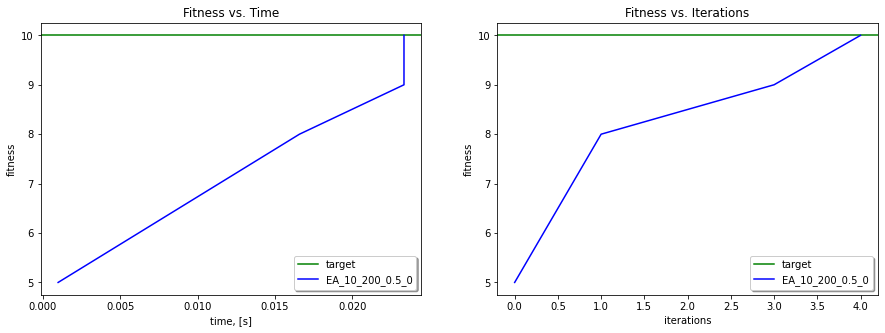

In [10]:
# PLOTTING THE RESULTS
plt_uno = plotter.Plotter()
plt_uno.fitness_vs_time(10) # specify the length of the string

## III. Estimation of Distribution Algorithms (EDA)

**The ideas behind EDA:**
1. Reduce the number of metaparameters and operators:
    * EA: Mutation and crossover operations (arbitrary operators)
    * EDA: Select individuals from previous generation -> Estimate probability distribution -> Sample new individuals
2. Interrelation between variables:
    * EA: implicit (e.g. Building Block Hypothesis)
    * EDA: explicit, expressed via joint probability distribution, associated with distribution, estimated from individuals

<p align="center">
  <img src=IMG/Slide31.jpg>
</p>

## EA vs EDA: Hollywood Perspective

 Lion King's circle of life | Gattaca's genetically modified humans
- | - 
<img src="https://media.giphy.com/media/RD6xYydS43msU/giphy.gif" width="512" align="center">| <img src="IMG\Gattaca.jpg" width="512" align="center">

<p align="center">
  <img src=IMG/Slide33.jpg>
</p>

<p align="center">
  <img src=IMG/Slide36.jpg>
</p>

<p align="center">
  <img src=IMG/Slide37.jpg>
</p>

<p align="center">
  <img src=IMG/Slide57.jpg>
</p>

<p align="center">
  <img src=IMG/Slide59.jpg>
</p>

## Let's code UMDA!

<img src="https://media.giphy.com/media/5ntdy5Ban1dIY/giphy.gif" width="768" align="center">

### EDA (UMDA) Methods

- UMDA uses the same methods as EA: `generate_parent`, `population`, `selection`.
- It doesn't use the methods: `mutate` and `crossover`. 
- Instead, it uses `vector_from_pop` to create the probability distribution and `pop_from_vector` to sample population from this distribution.

### 1. Define all the EDA methods

In [11]:
class UMDA(EA):

    def __init__(self, parameters, get_fitness, **kwargs):
        super().__init__(parameters, get_fitness, **kwargs)
        self.alg_type = 'UMDA'
        self.mutation = None
        self.name = self.give_name()
        self.distr = None
        self.vector = None

    def vector_from_pop(self):
        vector = []
        distr = []
        for i in range(self.length):
            vector.append(sum(ind.Genes[i] for ind in self.pop) / len(self.pop))
        for j in range(len(vector)):
            distr.append(np.array([vector[j], 1 - vector[j]]))
        self.distr = distr
        self.vector = vector

    def pop_from_vector(self):
        pop = []
        a_list = self.gene_set[::-1]
        for k in range(self.pop_size):
            ind = []
            for i in self.distr:
                ind.append(random.choices(a_list, i)[0])
            pop.append(Chromosome(ind, ind.count(1)))
        self.pop = pop
        
    def display(self, candidate):
        timeDiff = datetime.datetime.now() - self.start_time
        if len(candidate.Genes) > 30:
            print("{0}\t{1}...{2}\t{3:3.2f}\t{4}".format(
                'It_' + str(self.iteration),
                ''.join(map(str, candidate.Genes[:15])),
                ''.join(map(str, candidate.Genes[-15:])),
                candidate.Fitness,
                str(timeDiff)))
        else:
            print("{0}\t{1}\t{2:3.2f}\t{3}".format(
                'It_' + str(self.iteration),
                ''.join(map(str, candidate.Genes)),
                candidate.Fitness,
                str(timeDiff)))

        with open(self.name, mode='a') as file:
            header = ['iteration', 'best_ind', 'fitness', 'time', 'vector']
            writer = csv.writer(file, delimiter=',')

            if os.path.getsize(self.name) == 0:
                writer.writerow(header)
                writer.writerow([self.iteration, candidate.Genes, candidate.Fitness, timeDiff, self.vector])
            else:
                writer.writerow([self.iteration, candidate.Genes, candidate.Fitness, timeDiff, self.vector])
    
    def get_best_umda(self, initial_pop):
        
        random.seed()
        self.start_time = datetime.datetime.now()
        
        if len(initial_pop) != 0:
            self.pop = initial_pop
        else:
            self.population()

        self.selection()
        best_parent = self.pop[0]
        self.display(best_parent)
        
        # Stopping criterion
        if best_parent.Fitness >= self.length:
            return best_parent
        
        while True:
            
            self.iteration += 1
            self.vector_from_pop()
            self.pop_from_vector()
            self.selection()
            best_child = self.pop[0]
            
            if best_parent.Fitness >= best_child.Fitness:
                continue
            self.display(best_child)
            
            # Stopping criterion
            if best_child.Fitness >= self.length:
                return best_child

            best_parent = best_child

In [12]:
parameters = {'gene_set': [0, 1],
              'length': 10,
              'pop_size': 10,
              'selection_ratio': 0.5,
              'mutation': 0}

initial_population = []

def get_fitness(genes):
    return genes.count(1)

### 2. Create the population

In [13]:
umda = UMDA(parameters, get_fitness)
umda.population()

for individual in umda.pop:
    print("Genes: {}; Fitness: {};".format(individual.Genes, individual.Fitness))

Genes: [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [0, 1, 0, 1, 1, 0, 1, 0, 1, 0]; Fitness: 5;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 0, 0, 1, 1, 0, 1, 0, 0, 1]; Fitness: 5;
Genes: [0, 1, 0, 1, 1, 0, 1, 0, 1, 0]; Fitness: 5;
Genes: [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [1, 0, 0, 1, 0, 1, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]; Fitness: 5;
Genes: [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]; Fitness: 5;


### 3. Make selection

In [14]:
umda.selection()

for individual in umda.pop:
    print("Genes: {}; Fitness: {};".format(individual.Genes, individual.Fitness))

Genes: [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [0, 1, 0, 1, 1, 0, 1, 0, 1, 0]; Fitness: 5;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]; Fitness: 5;
Genes: [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 0, 0, 1, 1, 0, 1, 0, 0, 1]; Fitness: 5;


### 4. Make a probability distribution from the population

In [15]:
umda.vector_from_pop()

print(umda.vector)

[0.4, 0.6, 0.4, 0.6, 1.0, 0.0, 0.4, 0.6, 0.6, 0.4]


### 5. Sample new population from the vector

In [16]:
umda.pop_from_vector()

for individual in umda.pop:
    print("Genes: {}; Fitness: {};".format(individual.Genes, individual.Fitness))

Genes: [1, 1, 0, 1, 1, 0, 0, 1, 1, 1]; Fitness: 7;
Genes: [0, 0, 1, 0, 1, 0, 1, 0, 1, 0]; Fitness: 4;
Genes: [0, 1, 0, 1, 1, 0, 0, 0, 1, 0]; Fitness: 4;
Genes: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]; Fitness: 5;
Genes: [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]; Fitness: 5;
Genes: [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]; Fitness: 3;
Genes: [1, 1, 1, 0, 1, 0, 0, 1, 1, 1]; Fitness: 7;
Genes: [1, 1, 1, 0, 1, 0, 0, 0, 1, 0]; Fitness: 5;
Genes: [0, 1, 0, 0, 1, 0, 0, 1, 0, 1]; Fitness: 4;
Genes: [0, 0, 0, 1, 1, 0, 0, 0, 1, 1]; Fitness: 4;


### 6. Repeat all the operations in a loop

In [17]:
parameters = {'gene_set': [0, 1],
              'length': 10,
              'pop_size': 30,
              'selection_ratio': 0.5,
              'mutation': 0}

initial_population = []

def get_fitness(genes):
    return genes.count(1)

In [18]:
umda = UMDA(parameters, get_fitness)
umda.get_best_umda(initial_population)

It_0	1001100110	5.00	0:00:00
It_1	1111101101	8.00	0:00:00.008125
It_2	1011111111	9.00	0:00:00.012246
It_3	1111111111	10.00	0:00:00.015711


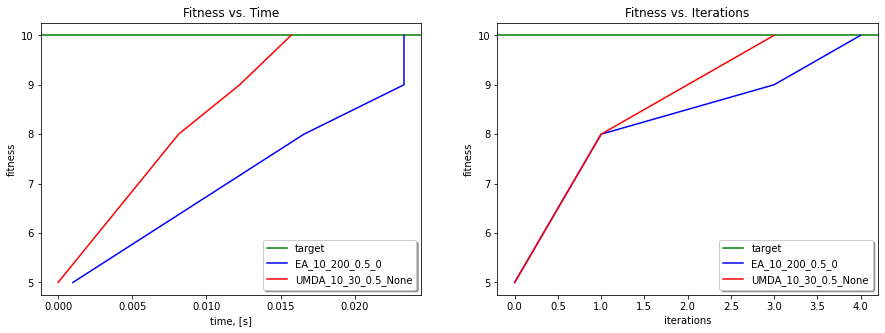

In [19]:
plt_uno = plotter.Plotter()
plt_uno.fitness_vs_time(10) # specify the length of the bitstring

## IV. EA vs EDA

In [20]:
class OneMaxTests(UMDA):
    def __init__(self, parameters, get_fitness, **kwargs):
        super().__init__(parameters, get_fitness, **kwargs)
        self.population()
        self.initial_pop = self.pop

    def test_ea(self):
        a = EA(parameters, get_fitness)
        a.get_best_ea(self.initial_pop)

    def test_umda(self):
        a = UMDA(parameters, get_fitness)
        a.get_best_umda(self.initial_pop)
        
    def test(self):
        print("=====Testing UMDA=====")
        self.test_umda()
        print("=====Testing EA=====")
        self.test_ea()

In [21]:
parameters = {'gene_set': [0, 1],
              'length': 90,
              'pop_size': 120,
              'selection_ratio': 0.25,
              'mutation': 0.01}

def get_fitness(genes):
    return genes.count(1)

In [23]:
cd = OneMaxTests(parameters, get_fitness)
cd.test()

=====Testing UMDA=====
It_0	101010010110101...110101010101010	45.00	0:00:00
It_1	111111010110111...000010100011101	57.00	0:00:00.041159
It_2	110111111111101...110011101001001	62.00	0:00:00.086257
It_3	010111011010011...011110111101110	66.00	0:00:00.142117
It_4	001111111110001...111110111111011	72.00	0:00:00.194064
It_5	011011111110111...111111111111011	75.00	0:00:00.249865
It_6	111111111100111...101111111111111	79.00	0:00:00.308523
It_7	111111111111011...111111111111011	83.00	0:00:00.360922
It_8	111111111111111...111110111111111	86.00	0:00:00.414763
It_9	111111111111111...111110111111111	89.00	0:00:00.462360
It_11	111111111111111...111111111111111	90.00	0:00:00.590852
=====Testing EA=====
It_0	101010010110101...110101010101010	45.00	0:00:00
It_1	101110011111011...101100100000111	52.00	0:00:00.017120
It_2	000111111110011...101110111100101	56.00	0:00:00.027783
It_3	111111011111011...111110100100111	58.00	0:00:00.048878
It_4	011111111110011...111110000111111	63.00	0:00:00.062923
It_5	1111

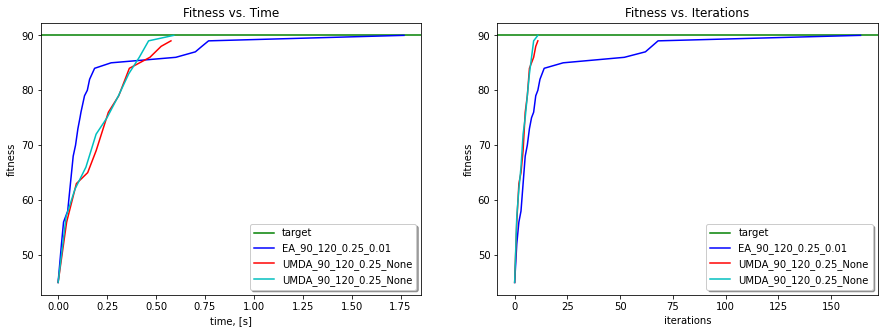

In [24]:
plt_uno = plotter.Plotter()
plt_uno.fitness_vs_time(90)

ALGORITHM_LENGTH_POP_RATIO_MUTATION

# Thank You!

# Q&A